# Data Cleaning: Amazon Product Reviews Dataset

Note: This notebook is assumed to be run from the `lstm` directory of this project

In [36]:
import os
import typing
import numpy as np
from tqdm import tqdm
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Load data

In [2]:
PROJECT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'amazon-product-reviews')
DATA_FILE = os.path.join(DATA_DIR, 'Reviews.csv')

Load csv file into Pandas dataframe

In [3]:
df = pd.read_csv(DATA_FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


For this project, we're only interested in the `Summary` and `Text` attributes

In [4]:
df = df[['Text', 'Summary']]
df = df[df['Summary'].isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568427 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Text     568427 non-null  object
 1   Summary  568427 non-null  object
dtypes: object(2)
memory usage: 13.0+ MB


## 2. Clean data

In [19]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [30]:
import re

def text_cleaner(text: str) -> str:
    text = text.lower().strip().replace('\n', '')
    text = text.replace("<br />", " ").replace("\s+", "")
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])  
    text = re.sub(r"'s\b","", text)
    text = re.sub("[^a-zA-Z0-9\!\.\",\']", " ", text)
    text = BeautifulSoup(text, "lxml").text
    
    return text
    

Small sanity test for `text_cleaner`

In [31]:
sample = "The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap..."
print(sample)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


In [32]:
text_cleaner(sample)

'the variety packs taste great!  i have them every morning. at  0.30 cents per meal, i do not understand why everyone on earth is not buying this stuff up.  maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. you do not get tired of the same ole thing, and they taste great.  i just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!  taste really good and takes minutes to prepare.  not sure why everyone on earth is not this. convenient, healthy, very quick, excellent quality, and extremely cheap...'

**Clean every record of the dataframe**

In [37]:
clean_text = []
for t in tqdm(df['Text']):
    clean_text.append(text_cleaner(t))

clean_summary = []
for t in tqdm(df['Summary']):
    clean_summary.append(text_cleaner(t))
    
df['Text'] = clean_text
df['Summary'] = clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.info()

 25%|██▌       | 144776/568427 [00:16<00:47, 8955.66it/s]/home/erik/.cache/pypoetry/virtualenvs/dd2424-text-summarization-GSmT3uUC-py3.8/lib/python3.8/site-packages/bs4/__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████| 568427/568427 [01:03<00:00, 8936.38it/s]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 568349 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Text     568349 non-null  object
 1   Summary  568349 non-null  object
dtypes: object(2)
memory usage: 13.0+ MB


In [38]:
df.head(5)

,Text,Summary
0,i have bought several of the vitality canned d...,good quality dog food
1,product arrived labeled as jumbo salted peanut...,not as advertised
2,this is a confection that has been around a fe...,"""delight"" says it all"
3,if you are looking for the secret ingredient i...,cough medicine
4,great taffy at a great price. there was a wid...,great taffy


## 3. Dataset statistics

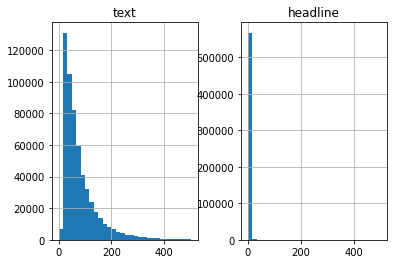

In [40]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['Text']:
    temp = i.split()
    text_word_count.append(len(temp))

for j in df['Summary']:
    temp = j.split()
    summary_word_count.append(len(temp))

length_df = pd.DataFrame({'text': text_word_count, 'headline': summary_word_count})
length_df.hist(bins = 30,range=[0,500])
plt.show()

## 4. Dataset splitting

In this step, we're going to divide the data into training/testing partitions with the proportions of 80/20

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Text'], df['Summary'], test_size=0.2, random_state=0, shuffle=True)

In [47]:
print(len(x_train))
print(len(y_train))

454679
454679


**Create training dataframe**

In [48]:
train_df = pd.DataFrame({'text': x_train, 'summary': y_train})
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454679 entries, 390352 to 305768
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     454679 non-null  object
 1   summary  454679 non-null  object
dtypes: object(2)
memory usage: 10.4+ MB


In [50]:
train_df.head(10)

,text,summary
390352,"yes, it is usually comes in crumbs form. like ...",best crumbs ever
337248,my husband hated this coffee. he tries all dif...,do not like it
57784,gummi candy is great and it does not get any b...,haribo gummi candy
553588,i can barely eat one of these without risk of ...,hard as bricks
361344,this is a great product and the price is the b...,best product
244653,these are the best low fat refried beans i hav...,great taste for low fat
547634,"there is no comparison to those other ""low fat...",new favorite chips
502658,these are great! they taste very fresh and ha...,delicious!
265138,we now have another gluten free hit! we do not...,brown lovely when you bake them just a little ...
134244,i use this coffee as a compromise between tast...,much less expensive at the supermarket


Save the data to file

In [52]:
TRAIN_PATH = os.path.join(DATA_DIR, 'train.csv')
train_df.to_csv(TRAIN_PATH, index=False)

**Create testing dataframe**

In [53]:
test_df = pd.DataFrame({'text': x_test, 'summary': y_test})
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113670 entries, 64922 to 405071
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     113670 non-null  object
 1   summary  113670 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [54]:
TEST_PATH = os.path.join(DATA_DIR, 'test.csv')
test_df.to_csv(TEST_PATH, index=False)